In [1]:
import sys
sys.path.insert(0, "../..")

In [2]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split

from logistic_regression import LogisticRegressionGD
from extrapolation import *
from experiments import Experiment

In [3]:
device = "cpu"

X = []
with open("../../../madelon_train.data") as f:
    for line in f:
        X.append([float(x) for x in line.split()])
X = np.array(X)
X /= X.max()
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
X = torch.tensor(X, device=device)
with open("../../../madelon_train.labels") as f:
    y = [int(x) for x in f]
y = torch.tensor(y, device=device)
X.shape, y.shape

(torch.Size([2000, 501]), torch.Size([2000]))

In [4]:
np.random.seed(2020)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

$\tau = 10^2$

In [5]:
model = LogisticRegressionGD(X_train, y_train, 1e2, device=device)

In [6]:
model.fit(1e-8, max_iter=100500)

In [7]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5600, dtype=torch.float64)

In [8]:
len(model.log)

2630

In [9]:
experiment = Experiment(model.log, model.obj, values=model.value_log, device=device)

In [10]:
experiment.run_method("RRE+QR", RRE, 5, method_kwargs={"qr": True})

In [11]:
experiment.run_method("RNA+ls", RNA, 5, method_kwargs={"lambda_range": (1e-15, 1e-2), "linesearch": True})

In [12]:
experiment.run_method("Epsilon inv", vector_epsilon_v1, 10, method_kwargs={"k": 5})

In [13]:
experiment.run_method("Topological epsilon", topological_vector_epsilon, 10, method_kwargs={"k": 5})

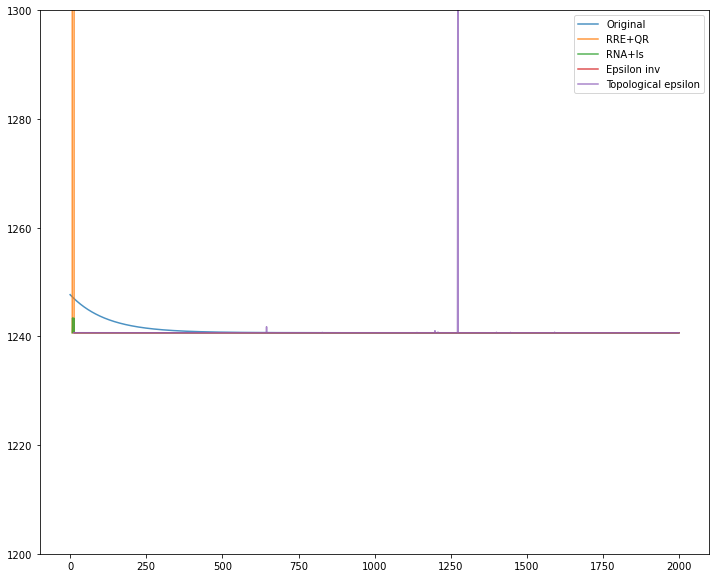

In [14]:
experiment.plot_values(n=2000, figsize=(12, 10), ylim=(1200, 1300))

../../experiments.py:64: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x[k + 2::stride])]) - best)),
../../experiments.py:64: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x[k + 2::stride])]) - best)),


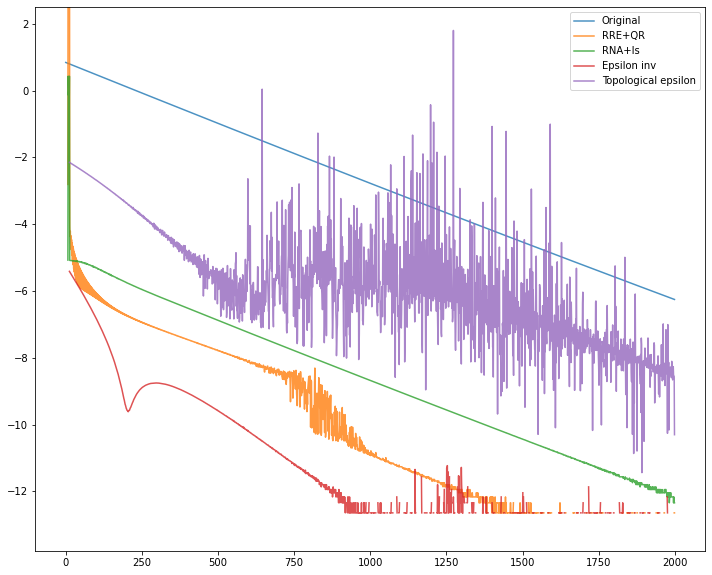

In [15]:
experiment.plot_log_diff(n=2000, figsize=(12, 10), ylim=(None, 2.5))

In [16]:
model.theta = experiment.best_x
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5600, dtype=torch.float64)

$\tau = 10^{-3}$

In [17]:
model = LogisticRegressionGD(X_train, y_train, 1e-3, device=device)

In [18]:
model.fit(1e-8, max_iter=100500)

In [19]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5600, dtype=torch.float64)

In [20]:
experiment = Experiment(model.log, model.obj, values=model.value_log, device=device)

In [21]:
experiment.run_method("RRE+QR", RRE, 5, method_kwargs={"qr": True})

In [22]:
experiment.run_method("RNA+ls", RNA, 5, method_kwargs={"lambda_range": (1e-15, 1e-2), "linesearch": True})

In [23]:
experiment.run_method("Epsilon inv", vector_epsilon_v1, 10, method_kwargs={"k": 5})

In [24]:
experiment.run_method("Topological epsilon", topological_vector_epsilon, 10, method_kwargs={"k": 5})

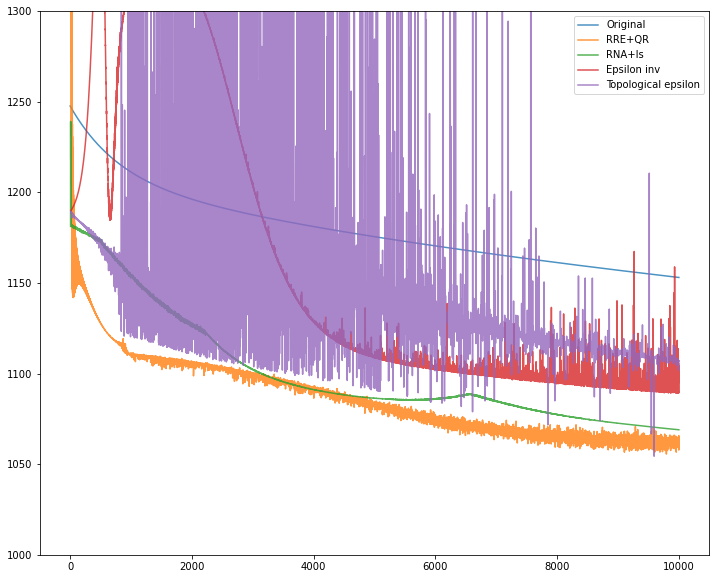

In [25]:
experiment.plot_values(n=10000, figsize=(12, 10), ylim=(1000, 1300))

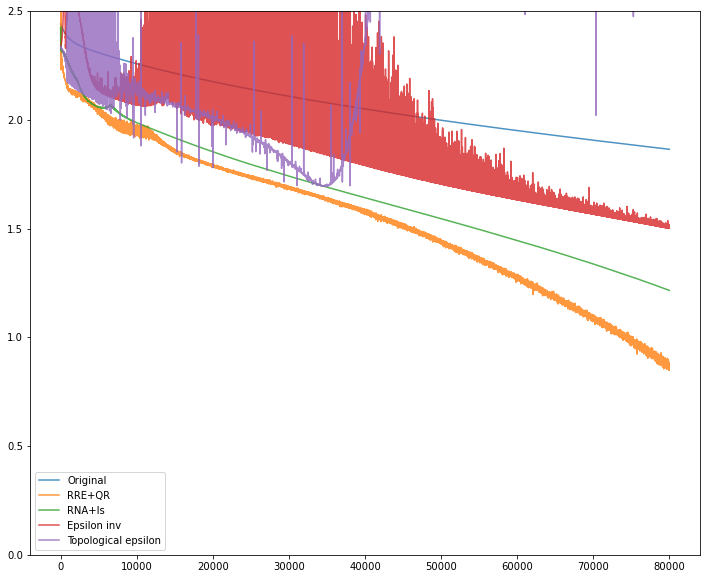

In [26]:
experiment.plot_log_diff(n=80000, figsize=(12, 10), ylim=(0, 2.5))

In [27]:
model.theta = experiment.best_x
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5450, dtype=torch.float64)